In [50]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns


from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,StratifiedKFold,GridSearchCV,cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, plot_roc_curve
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTE, ADASYN
# conda install -c conda-forge imbalanced-learn
# pip install -U imbalanced-learn

In [51]:
red = pd.read_csv('winequality-red.csv', sep=';')

In [52]:
white = pd.read_csv('winequality-white.csv', sep=';')

In [53]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [54]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [55]:
red = red.assign(sort=1)
white = white.assign(sort=0)

In [56]:
wines = pd.concat([red, white], ignore_index=True)
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sort
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [57]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sort
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [58]:
wines['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [59]:
wines=wines.drop_duplicates()

In [60]:
wines['quality'].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

# ===================================================

In [61]:
def logreg_scores(coef, X_train, X_test, y_train, y_test):
    logreg = LogisticRegression(multi_class='multinomial', random_state=42,C=coef,penalty='l1',solver='saga', max_iter=30000)
    logreg.fit(X_train,y_train)
    score_train=logreg.score(X_train,y_train)
    print("Train score: {}".format(score_train))
    score_test=logreg.score(X_test,y_test)
    print("Test score: {}".format(score_test))
    
    pred = logreg.predict(X_test)
    
    print("F1-score: {}".format(f1_score(y_test, pred, average='micro')))
    print("\n")
    cm = confusion_matrix(y_test, pred)
    print("Confusion matrix:\n {}\n".format(cm))

In [62]:
scaler = StandardScaler()

X = wines.drop(['quality'],axis=1)
y = wines['quality']
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{3: 26, 4: 168, 5: 1404, 6: 1865, 7: 666, 8: 123, 9: 4}

In [64]:
print(logreg_scores(1, X_train, X_test, y_train, y_test))

Train score: 0.5538063909774437
Test score: 0.5422932330827067
F1-score: 0.5422932330827067


Confusion matrix:
 [[  0   0   1   3   0   0   0]
 [  0   3  18  16   1   0   0]
 [  0   0 209 138   1   0   0]
 [  0   0 114 322  22   0   0]
 [  0   0   3 144  43   0   0]
 [  0   0   0  18   7   0   0]
 [  0   0   0   0   1   0   0]]

None


In [66]:
print(logreg_scores(0.1, X_train, X_test, y_train, y_test))

Train score: 0.5493421052631579
Test score: 0.543233082706767
F1-score: 0.543233082706767


Confusion matrix:
 [[  0   0   1   3   0   0   0]
 [  0   1  20  16   1   0   0]
 [  0   0 214 133   1   0   0]
 [  0   0 112 328  18   0   0]
 [  0   0   3 152  35   0   0]
 [  0   0   0  21   4   0   0]
 [  0   0   0   0   1   0   0]]

None


# ===================================================
# Now with oversampling

In [29]:
def logreg_scores_over(coef):
    logreg = LogisticRegression(multi_class='multinomial', random_state=42,C=coef,penalty='l1',solver='saga', max_iter=30000)
    logreg.fit(X_resampled,y_resampled)
    score_train=logreg.score(X_resampled,y_resampled)
    print("Train score: {}".format(score_train))
    score_test=logreg.score(X_test,y_test)
    print("Test score: {}".format(score_test))
    print("Difference: {}".format(score_train-score_test))
    
    pred = logreg.predict(X_test)
    print("\n")
    cm = confusion_matrix(y_test, pred)
    print("Confusion matrix:\n {}\n".format(cm))
    
    #plot_roc_curve(logreg, X_test, y_test)
    #print("\nRecall(TPR) score: {}".format(recall_score(y_test, pred)))
    #print("\nPrecision(PPV) score: {}".format(precision_score(y_test, pred)))
    #print("\nF1 score: {}".format(f1_score(y_test, pred)))

In [67]:
# using imbalance methods
oversampler=SMOTE(k_neighbors=3)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [68]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{3: 1865, 4: 1865, 5: 1865, 6: 1865, 7: 1865, 8: 1865, 9: 1865}

In [69]:
print(logreg_scores(1, X_resampled, X_test, y_resampled, y_test))

Train score: 0.5352738414400613
Test score: 0.34962406015037595
F1-score: 0.34962406015037595


Confusion matrix:
 [[  1   1   0   1   0   1   0]
 [ 10  14   3   4   5   2   0]
 [ 51  53 155  61  13  13   2]
 [ 38  47 100 117  96  56   4]
 [  7   2   7  31  70  69   4]
 [  1   1   0   2   7  14   0]
 [  0   0   0   0   0   0   1]]

None


In [70]:
print(logreg_scores(0.1, X_resampled, X_test, y_resampled, y_test))

Train score: 0.5321332822673305
Test score: 0.34022556390977443
F1-score: 0.34022556390977443


Confusion matrix:
 [[  1   1   0   1   0   1   0]
 [ 11  13   4   2   7   1   0]
 [ 48  54 156  59  17  12   2]
 [ 37  48 101 112  93  60   7]
 [  6   2   7  33  64  70   8]
 [  0   1   0   3   4  15   2]
 [  0   0   0   0   0   0   1]]

None


# ===================================================

# analyze + try to impove

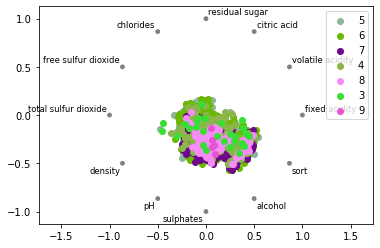

In [34]:
from pandas.plotting import radviz

plt.figure();
radviz(wines, "quality");

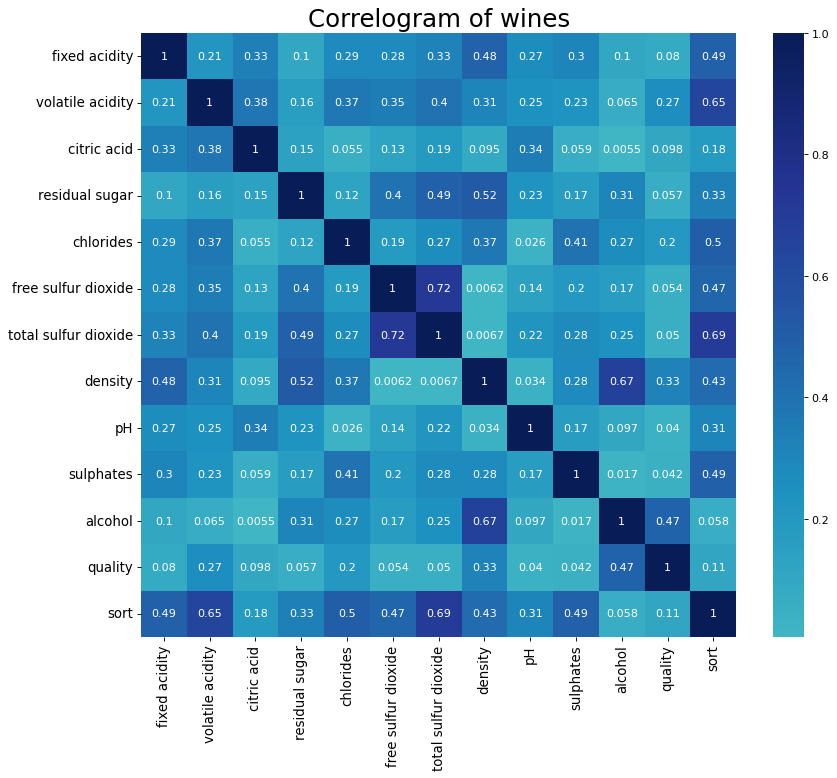

In [75]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(abs(wines.corr()), xticklabels=wines.corr().columns, yticklabels=wines.corr().columns, cmap='YlGnBu', center=0, annot=True)

# Decorations
plt.title('Correlogram of wines', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<p style='color:red'>sort / volatile acidity || sort / total sulfur dioxide || alcohol / density || total sulfur dioxide / free sulfur dioxide </p>


<Figure size 960x800 with 0 Axes>

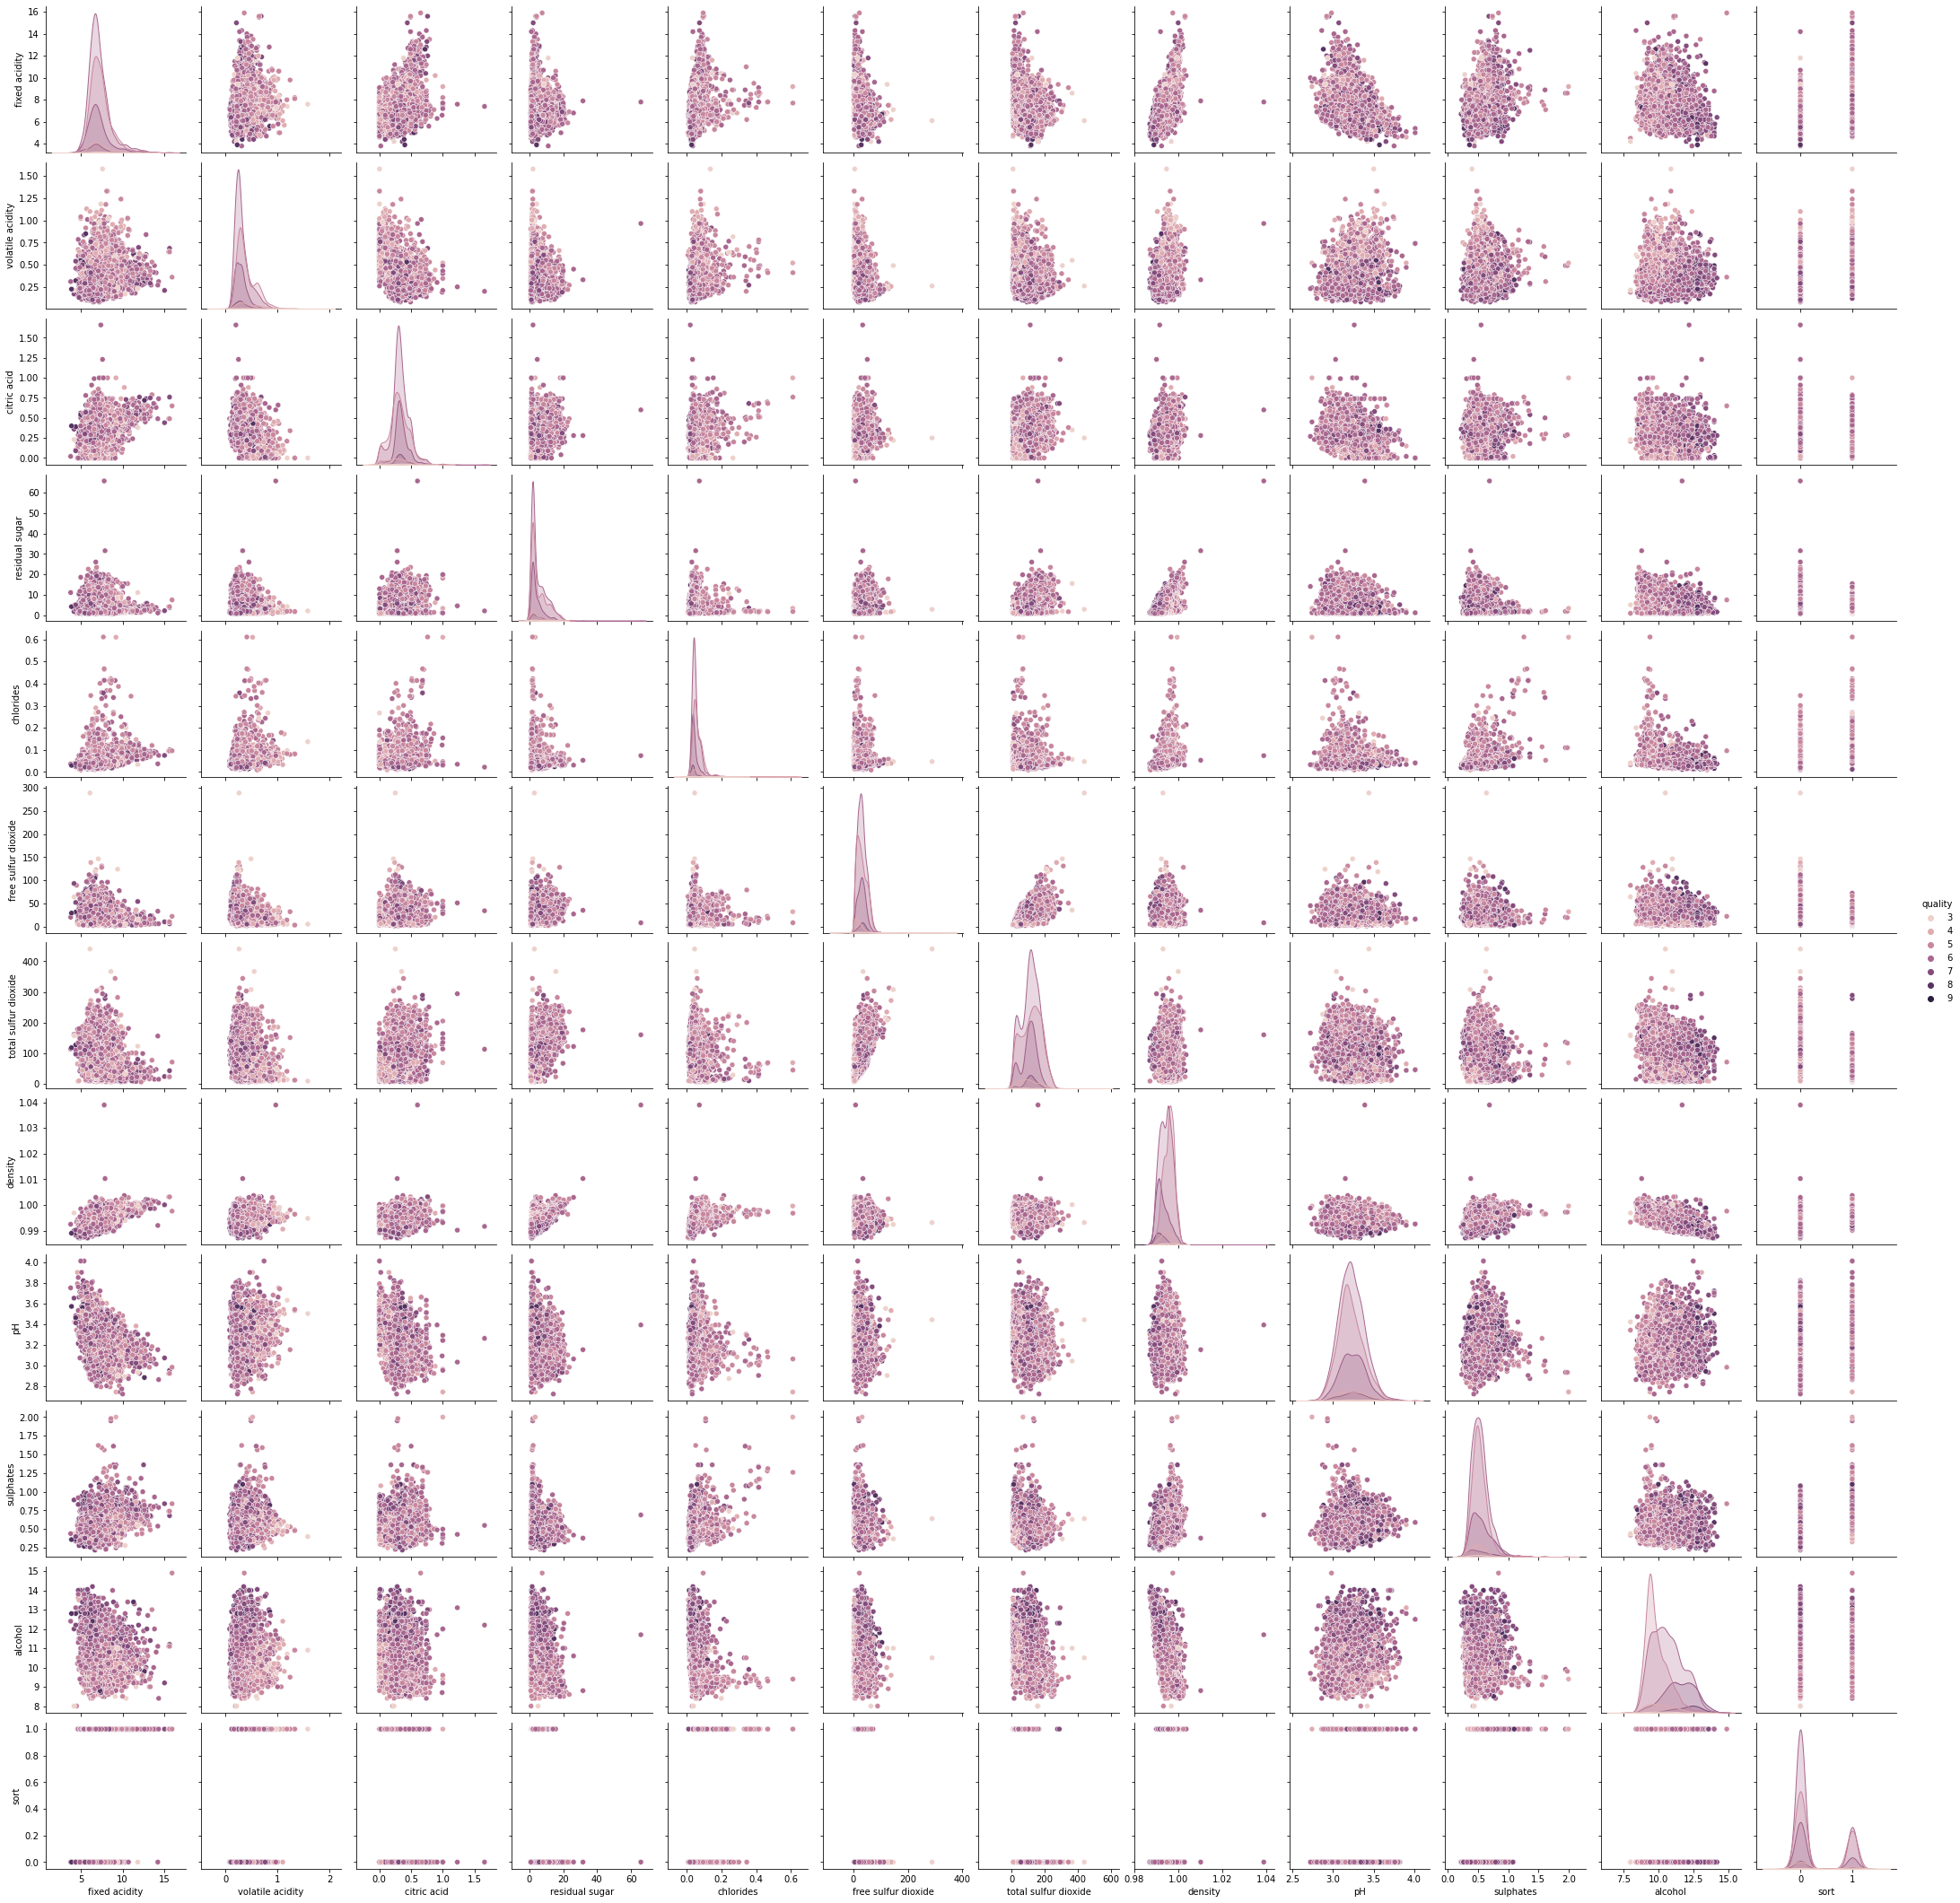

In [76]:
plt.figure(figsize=(12,10), dpi= 80)
sns.pairplot(wines, hue="quality")
plt.show()

<p style='color:red'> drop higly correlated features, as well as very big density and residual sugar samples </p>

In [77]:
wines = wines[wines.density != wines["density"].max()]
wines = wines[wines["residual sugar"] != wines["residual sugar"].max()]

In [78]:
wines = wines.drop(["density"],axis=1)
wines = wines.drop(['sort'],axis=1)
wines = wines.drop(["total sulfur dioxide"],axis=1)

In [79]:
scaler = StandardScaler()

X = wines.drop(['quality'],axis=1)
y = wines['quality']
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{3: 25, 4: 172, 5: 1417, 6: 1836, 7: 678, 8: 123, 9: 3}

In [81]:
print(logreg_scores(1, X_train, X_test, y_train, y_test))

Train score: 0.53737658674189
Test score: 0.5610902255639098
F1-score: 0.5610902255639098


Confusion matrix:
 [[  0   0   1   4   0   0   0]
 [  0   0  18  15   1   0   0]
 [  0   0 211 123   1   0   0]
 [  0   0 116 344  25   0   0]
 [  0   0   2 134  42   0   0]
 [  0   0   0  16   9   0   0]
 [  0   0   0   0   2   0   0]]

None


In [82]:
print(logreg_scores(0.1, X_train, X_test, y_train, y_test))

Train score: 0.5371415138692995
Test score: 0.5592105263157895
F1-score: 0.5592105263157895


Confusion matrix:
 [[  0   0   1   4   0   0   0]
 [  0   0  18  15   1   0   0]
 [  0   0 210 124   1   0   0]
 [  0   0 118 346  21   0   0]
 [  0   0   3 136  39   0   0]
 [  0   0   0  17   8   0   0]
 [  0   0   0   0   2   0   0]]

None


# ================================================

In [83]:
# now instead of 3 neighbors lets try 2

oversampler=SMOTE(k_neighbors=2)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [84]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{3: 1836, 4: 1836, 5: 1836, 6: 1836, 7: 1836, 8: 1836, 9: 1836}

In [86]:
print(logreg_scores(1, X_resampled, X_test, y_resampled, y_test))

Train score: 0.5172735760971056
Test score: 0.3073308270676692
F1-score: 0.3073308270676692


Confusion matrix:
 [[  0   1   0   2   0   1   1]
 [  7  17   2   4   2   2   0]
 [ 65  85 113  52  14   6   0]
 [ 42  67  84 127  85  72   8]
 [  3   6   5  31  56  72   5]
 [  1   3   0   3   4  13   1]
 [  0   0   0   0   0   1   1]]

None


In [87]:
print(logreg_scores(0.1, X_resampled, X_test, y_resampled, y_test))

Train score: 0.5159508247743542
Test score: 0.30451127819548873
F1-score: 0.30451127819548873


Confusion matrix:
 [[  0   1   0   2   0   1   1]
 [  7  16   2   4   2   3   0]
 [ 62  85 115  52  15   6   0]
 [ 41  68  86 127  79  74  10]
 [  3   6   6  31  53  72   7]
 [  1   3   0   4   3  12   2]
 [  0   0   0   0   0   1   1]]

None


## In this particular example didnt work great on f1-score, but with improvement steps model get better results than without them. Strongly correlated features need to be dropped from X list